In [1]:
import sys
import os


sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))
print(sys.path[-1])

/home/cotsios/dsit/2nd-semester/algos-in-mol-bio/py-dali


In [2]:
import random
import numpy as np

from src.utils import quick_load
from src.monte_carlo import MonteCarloProteinAligner

In [3]:
BASE_DIR = os.path.dirname(os.getcwd())
REDUCED_DIRS = os.path.join(BASE_DIR, "reduced")

print("BASE_DIR:", BASE_DIR)
print("REDUCED_DIRS:", REDUCED_DIRS)

BASE_DIR: /home/cotsios/dsit/2nd-semester/algos-in-mol-bio/py-dali
REDUCED_DIRS: /home/cotsios/dsit/2nd-semester/algos-in-mol-bio/py-dali/reduced


In [4]:
sample1 = quick_load(
    os.path.join(REDUCED_DIRS, "1euv_A.pkl.gz")
)

sample2 = quick_load(
    os.path.join(REDUCED_DIRS, "1tgz_A.pkl.gz")
)

Iteration 1000: Current Score = -31.197, Best Score = -22.291, Acceptance Rate = 0.789
Iteration 2000: Current Score = 83.649, Best Score = 84.442, Acceptance Rate = 0.673
Iteration 3000: Current Score = 131.655, Best Score = 132.602, Acceptance Rate = 0.541
Iteration 4000: Current Score = 161.232, Best Score = 161.232, Acceptance Rate = 0.425
Iteration 5000: Current Score = 169.979, Best Score = 170.053, Acceptance Rate = 0.346

Simulation completed!
Best score: 170.053
Final acceptance rate: 0.346
Best alignment has 99 matched patterns

Best alignment found:
Matched patterns: [(41, 96), (32, 61), (19, 91), (6, 39), (3, 1), (16, 93), (87, 55), (90, 3), (12, 16), (5, 0), (31, 86), (53, 74), (63, 10), (40, 22), (43, 28), (71, 69), (52, 42), (25, 40), (38, 38), (4, 4), (46, 33), (56, 67), (37, 25), (1, 9), (48, 13), (84, 37), (34, 81), (26, 34), (49, 32), (92, 27), (66, 11), (58, 78), (50, 66), (91, 60), (9, 18), (30, 48), (33, 73), (27, 14), (44, 45), (39, 30), (28, 51), (70, 97), (73, 

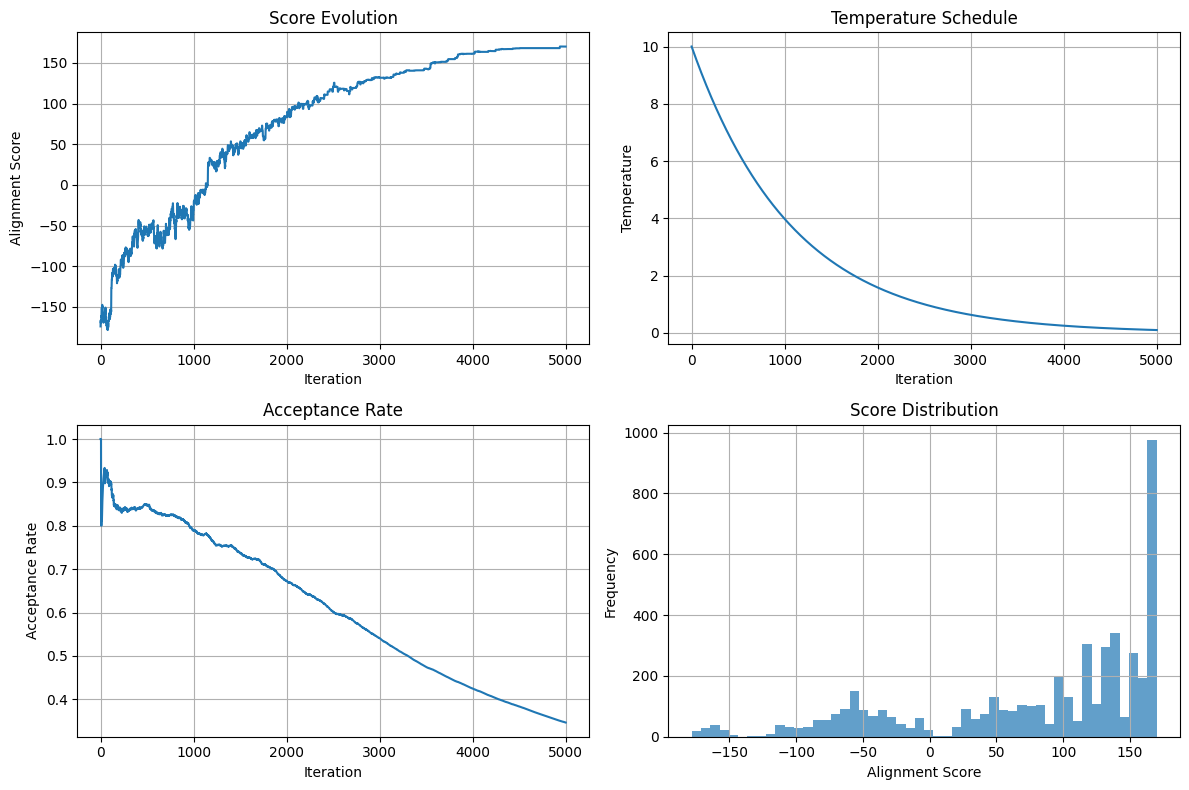

In [5]:
aligner = MonteCarloProteinAligner(sample1, sample2)
aligner.set_temperature_schedule(
    initial_temp=10.0, final_temp=0.1, schedule_type="exponential"
)
best_alignment = aligner.run_simulation(
    max_iterations=5000, verbose=True
)
print(f"\nBest alignment found:")
print(f"Matched patterns: {best_alignment.get_aligned_pairs()}")
print(f"Unaligned patterns: {best_alignment.get_unaligned_patterns()}")
aligner.plot_convergence()